In [1]:
import pandas as pd
import numpy as np

In [2]:
high_schools = pd.read_csv('../data/full_highschool_data.csv')
high_schools.shape

/var/folders/07/lc6xyqmx2szbq9t8c_f7m2pm0000gn/T/ipykernel_84503/2139419286.py:1: DtypeWarning: Columns (804,805,1040,1041,1159,1160,1203) have mixed types. Specify dtype option on import or set low_memory=False.
  high_schools = pd.read_csv('../data/full_highschool_data.csv')


(7356, 1397)

In [3]:
high_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7356 entries, 0 to 7355
Columns: 1397 entries, LEA_STATE to ACT
dtypes: bool(16), float64(1362), int64(3), object(16)
memory usage: 77.6+ MB


In [4]:
high_schools.dropna(subset=['ACT'], inplace=True)
high_schools.shape

(6918, 1397)

In [5]:
# sort columns by percentage NA
(high_schools.isna().sum()/high_schools.shape[0]).sort_values(ascending=False)

SCH_HBREPORTED_DIS_WH_F       1.0
SCH_DISCWODIS_MULTOOS_AM_M    1.0
SCH_DISCWODIS_MULTOOS_WH_F    1.0
SCH_DISCWODIS_MULTOOS_WH_M    1.0
SCH_DISCWODIS_MULTOOS_BL_F    1.0
                             ... 
TOT_DISCWODIS_EXPZT_F         0.0
TOT_DISCWODIS_EXPZT_M         0.0
SCH_DISCWODIS_EXPZT_TR_F      0.0
SCH_DISCWODIS_EXPZT_TR_M      0.0
ACT                           0.0
Length: 1397, dtype: float64

In [6]:
# drop columns with no data
high_schools = high_schools.dropna(axis=1, how='all')
high_schools.shape

(6918, 914)

In [7]:
# fill in values for missing indicators
high_schools['SCH_FIREARM_IND'].fillna(False, inplace=True)
high_schools['SCH_HOMICIDE_IND'].fillna(False, inplace=True)
high_schools['SCH_RET_G09_IND'].fillna(False, inplace=True)
high_schools['SCH_RET_G10_IND'].fillna(False, inplace=True)
high_schools['SCH_RET_G11_IND'].fillna(False, inplace=True)
high_schools['SCH_SSCLASSES_IND'].fillna(False, inplace=True)
high_schools['SCH_APSEL'].fillna(False, inplace=True)
high_schools['SCH_APMATHENR_IND'].fillna(False, inplace=True)
high_schools['SCH_APSCIENR_IND'].fillna(False, inplace=True)
high_schools['SCH_APOTHENR_IND'].fillna(False, inplace=True)

In [8]:
# fix enrolment for special cases
high_schools[~high_schools['SCH_APENR_IND']].filter(regex=r'.*_AP.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_CORPINSTANCES_IND']].filter(regex=r'.*_(DISCWO?DIS|CORPINSTANCES).*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_CREDITRECOVERY_IND']].filter(regex=r'.*_CREDITRECOVERY.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_DUAL_IND']].filter(regex=r'.*_DUAL.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_GT_IND']].filter(regex=r'.*_GTENR.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_IBENR_IND']].filter(regex=r'.*_IB.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_SSCLASSES_IND']].filter(regex=r'.*_SSCLASSES.*',axis=1).fillna(0, inplace=True)
high_schools[~high_schools['SCH_SSATHLETICS_IND']].filter(regex=r'.*_SS(SPORTS|TEAMS|PART).*',axis=1).fillna(0, inplace=True)

In [9]:
# drop columns with more than 60% na vals
high_schools = high_schools.dropna(axis=1, thresh=int(high_schools.shape[0]*(1-.6)))
high_schools.shape

(6918, 837)

In [10]:
high_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6918 entries, 0 to 7355
Columns: 837 entries, LEA_STATE to ACT
dtypes: bool(26), float64(804), int64(3), object(4)
memory usage: 43.0+ MB


In [11]:
high_schools.dtypes

LEA_STATE                     object
LEA_STATE_NAME                object
LEAID                          int64
LEA_NAME                      object
SCHID                          int64
                              ...   
SCH_DISCWDIS_TFRALT_LEP_M    float64
SCH_DISCWDIS_TFRALT_LEP_F    float64
SCH_DISCWDIS_TFRALT_504_M    float64
SCH_DISCWDIS_TFRALT_504_F    float64
ACT                          float64
Length: 837, dtype: object

In [12]:
# mark state and district name as a categorical variable
from sklearn.preprocessing import OrdinalEncoder
high_schools['LEA_STATE_NAME'] = OrdinalEncoder().fit_transform(high_schools['LEA_STATE_NAME'].to_numpy().reshape(-1,1))
high_schools['LEA_NAME'] = OrdinalEncoder().fit_transform(high_schools['LEA_NAME'].to_numpy().reshape(-1,1))

In [13]:
g = high_schools.columns.to_series().groupby(high_schools.dtypes).groups
high_schools = high_schools.loc[:,~high_schools.columns.isin({k.name: v for k, v in g.items()}['object'])]

In [14]:
high_schools = high_schools.drop(['LEAID', 'SCHID', 'COMBOKEY'], axis = 1)

In [15]:
high_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6918 entries, 0 to 7355
Columns: 832 entries, LEA_STATE_NAME to ACT
dtypes: bool(26), float64(806)
memory usage: 42.8 MB


In [16]:
high_schools.head(10)

,LEA_STATE_NAME,LEA_NAME,SCH_MATHCLASSES_ADVM,SCH_MATHCERT_ADVM,SCH_MATHENR_ADVM_HI_M,SCH_MATHENR_ADVM_HI_F,SCH_MATHENR_ADVM_AM_M,SCH_MATHENR_ADVM_AM_F,SCH_MATHENR_ADVM_AS_M,SCH_MATHENR_ADVM_AS_F,...,SCH_DISCWDIS_TFRALT_IDEA_WH_F,SCH_DISCWDIS_TFRALT_IDEA_TR_M,SCH_DISCWDIS_TFRALT_IDEA_TR_F,TOT_DISCWDIS_TFRALT_IDEA_M,TOT_DISCWDIS_TFRALT_IDEA_F,SCH_DISCWDIS_TFRALT_LEP_M,SCH_DISCWDIS_TFRALT_LEP_F,SCH_DISCWDIS_TFRALT_504_M,SCH_DISCWDIS_TFRALT_504_F,ACT
0,7.0,869.0,10.0,2.0,7.0,9.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.7
1,7.0,869.0,14.0,2.0,9.0,11.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.3
2,7.0,869.0,4.0,1.0,7.0,4.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.2
3,7.0,869.0,10.0,4.0,21.0,15.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.8
4,7.0,869.0,18.0,3.0,12.0,27.0,1.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5
5,7.0,869.0,19.0,5.0,21.0,13.0,3.0,1.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.3
6,7.0,869.0,13.0,3.0,12.0,15.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5
7,7.0,869.0,9.0,1.0,12.0,9.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8
8,7.0,869.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.4
9,7.0,869.0,16.0,0.0,11.0,14.0,3.0,1.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.9


<AxesSubplot:xlabel='LEA_STATE_NAME', ylabel='ACT'>

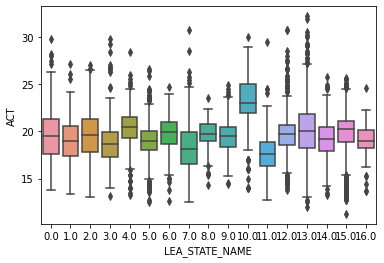

In [17]:
import seaborn as sns
sns.boxplot(x='LEA_STATE_NAME', y='ACT', data=high_schools)

In [18]:
X = high_schools.iloc[:,:-1]
y = high_schools['ACT']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [20]:
from sklearn.impute import KNNImputer
X_scaler = KNNImputer().fit_transform(X_scaler)

In [21]:
# replace missing data with either mean or median depending on skewness
# from scipy.stats import skew
#
# for i, col in enumerate(high_schools.columns):
#     if high_schools[col].dtype == object:
#         continue
#     sk = skew(high_schools[col], nan_policy='omit')
#     if abs(sk) > 1:
#         high_schools[col].fillna(high_schools[col].median(), inplace=True)
#     else:
#         high_schools[col].fillna(high_schools[col].mean(), inplace=True)

In [22]:
X_scaler_df = pd.DataFrame(X_scaler, columns=X.columns)
X_scaler_df.isna().sum()

LEA_STATE_NAME                0
LEA_NAME                      0
SCH_MATHCLASSES_ADVM          0
SCH_MATHCERT_ADVM             0
SCH_MATHENR_ADVM_HI_M         0
                             ..
TOT_DISCWDIS_TFRALT_IDEA_F    0
SCH_DISCWDIS_TFRALT_LEP_M     0
SCH_DISCWDIS_TFRALT_LEP_F     0
SCH_DISCWDIS_TFRALT_504_M     0
SCH_DISCWDIS_TFRALT_504_F     0
Length: 831, dtype: int64

In [23]:
np.isnan(X_scaler).sum()

0

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [25]:
pca = PCA()
pca.fit_transform(X_scaler)

array([[ 2.47099745e+00, -6.93021965e-01,  8.05858821e+00, ...,
         2.21259880e-16,  8.87938893e-16,  1.02634649e-14],
       [ 5.55673379e+00, -5.35143619e+00,  3.63261464e+00, ...,
        -9.79319797e-16, -1.60766758e-15,  1.45974989e-15],
       [-6.44028517e+00, -5.60648052e-01, -1.01801320e-01, ...,
         5.41215730e-17,  6.86433034e-16,  1.91504717e-14],
       ...,
       [-5.91744748e-01,  4.53855040e-01, -3.63375978e+00, ...,
        -1.24874413e-16, -8.09134652e-17, -1.20914153e-16],
       [-1.03360169e+01,  1.00380727e+00, -6.73234651e-01, ...,
         2.39380196e-17, -1.42350454e-16,  8.51784124e-17],
       [-7.09759382e+00, -1.05113845e-01, -1.52463917e+00, ...,
        -2.25452049e-16, -1.70892685e-16, -5.43470825e-17]])

In [26]:
pca.explained_variance_ratio_

array([1.88469405e-01, 6.37070572e-02, 3.75040951e-02, 3.57837321e-02,
       2.88890086e-02, 2.67987333e-02, 2.37385641e-02, 1.98061773e-02,
       1.57067621e-02, 1.32747030e-02, 1.28660452e-02, 1.08062008e-02,
       1.06938398e-02, 9.49944766e-03, 8.39196782e-03, 7.74690060e-03,
       7.59124323e-03, 7.33185661e-03, 7.09515047e-03, 6.70067480e-03,
       6.50648527e-03, 6.33657677e-03, 5.90493801e-03, 5.82797487e-03,
       5.74280697e-03, 5.58790893e-03, 5.31442710e-03, 5.25900121e-03,
       5.08692387e-03, 4.87334292e-03, 4.75234524e-03, 4.62170370e-03,
       4.52578380e-03, 4.40580901e-03, 4.34592596e-03, 4.22818215e-03,
       4.14194259e-03, 4.10833692e-03, 3.98117067e-03, 3.84080636e-03,
       3.80693425e-03, 3.75142938e-03, 3.70773626e-03, 3.65354697e-03,
       3.56902542e-03, 3.51872847e-03, 3.41383533e-03, 3.39908965e-03,
       3.38342330e-03, 3.28188365e-03, 3.21029116e-03, 3.16790086e-03,
       3.09237245e-03, 3.03371592e-03, 2.95929494e-03, 2.91882490e-03,
      

In [27]:
pca.explained_variance_ratio_.cumsum()

array([0.1884694 , 0.25217646, 0.28968056, 0.32546429, 0.3543533 ,
       0.38115203, 0.4048906 , 0.42469677, 0.44040353, 0.45367824,
       0.46654428, 0.47735048, 0.48804432, 0.49754377, 0.50593574,
       0.51368264, 0.52127388, 0.52860574, 0.53570089, 0.54240156,
       0.54890805, 0.55524463, 0.56114956, 0.56697754, 0.57272035,
       0.57830826, 0.58362268, 0.58888168, 0.59396861, 0.59884195,
       0.6035943 , 0.608216  , 0.61274178, 0.61714759, 0.62149352,
       0.6257217 , 0.62986364, 0.63397198, 0.63795315, 0.64179396,
       0.64560089, 0.64935232, 0.65306006, 0.6567136 , 0.66028263,
       0.66380136, 0.66721519, 0.67061428, 0.67399771, 0.67727959,
       0.68048988, 0.68365778, 0.68675015, 0.68978387, 0.69274316,
       0.69566199, 0.69849868, 0.70123652, 0.70391871, 0.70659406,
       0.70923437, 0.71185233, 0.71442521, 0.7169572 , 0.71945602,
       0.7219002 , 0.72433454, 0.72672888, 0.72908486, 0.73143069,
       0.73376178, 0.73606188, 0.73832998, 0.74056118, 0.74277

Text(0, 0.5, 'Cumulative Explained Variance')

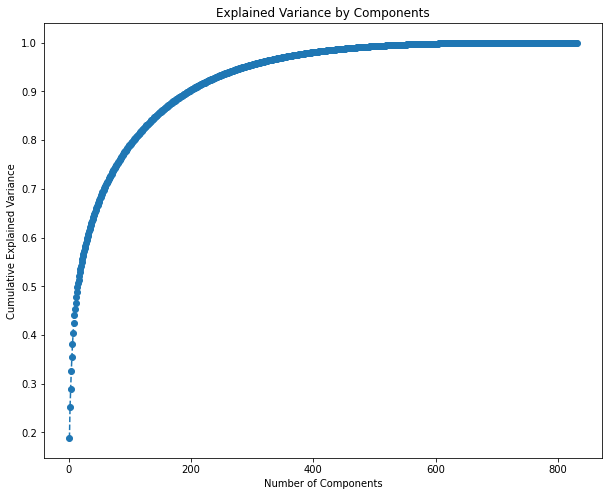

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(range(1,832), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [29]:
# Preserving 80% of the variance, we choose 120 components and fit the model to our data.
pca = PCA(n_components=120)
pca.fit(X_scaler)

PCA(n_components=120)

In [30]:
# We need the calculated resulting components scores for the elements in our dataset
scores_pca = pca.transform(X_scaler)

In [31]:
# Fitting K means with the transformed data from the PCA
wcss = []

for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

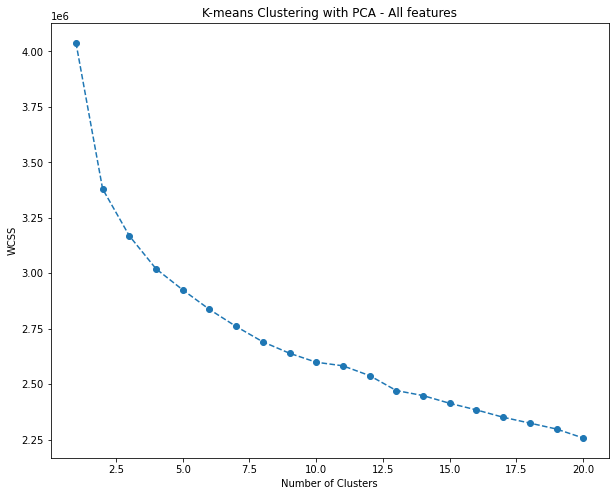

In [32]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle = '--')
plt.title('K-means Clustering with PCA - All features')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
# We choose 5 clusters from the Elbow method so we run it with 5 clusters and same initializer and random state
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [34]:
kmeans_pca_labels = kmeans_pca.fit(scores_pca)

In [35]:
# Copy original X dataset to X_pca so we can add the principal components and labels to it
X_pca = X_scaler
X_pca = pd.DataFrame(X_pca)

In [36]:
X_pca

,0,1,2,3,4,5,6,7,8,9,...,821,822,823,824,825,826,827,828,829,830
0,-0.370670,-0.953540,0.161024,-0.631112,-0.273063,-0.240599,0.326862,0.207380,-0.021939,-0.334357,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252
1,-0.370670,-0.953540,0.567727,-0.631112,-0.221471,-0.190434,0.326862,1.560626,-0.315887,-0.334357,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252
2,-0.370670,-0.953540,-0.449032,-0.745176,-0.273063,-0.366011,-0.255570,-0.243701,-0.168913,-0.260719,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252
3,-0.370670,-0.953540,0.161024,-0.402983,0.088078,-0.090105,-0.255570,-0.243701,-0.095426,-0.039807,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252
4,-0.370670,-0.953540,0.974430,-0.517047,-0.144084,0.210883,0.326862,-0.243701,-0.095426,-0.260719,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,1.513149,1.291307,-0.855735,-0.745176,-0.443315,-0.456307,-0.255570,-0.243701,-0.315887,-0.334357,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252
6914,1.513149,1.291307,-0.245680,-0.174855,-0.144084,-0.090105,-0.255570,-0.243701,-0.315887,-0.260719,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252
6915,1.513149,1.362979,-0.144004,-0.060791,-0.015105,-0.014858,-0.255570,-0.243701,-0.315887,-0.260719,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252
6916,1.513149,1.682408,-0.652383,-0.631112,-0.453633,-0.466340,-0.255570,-0.243701,-0.315887,-0.334357,...,-0.202925,-0.127021,-0.097642,-0.055902,-0.265758,-0.191704,-0.104003,-0.054456,-0.151187,-0.107252


In [37]:
scores_pca_df = pd.DataFrame(scores_pca)
scores_pca_df.columns = ['Cp1', 'Cp2', 'Cp3', 'Cp4', 'Cp5', 'Cp6', 'Cp7', 'Cp8', 'Cp9', 'Cp10', 'Cp11', 'Cp12', 'Cp13', 'Cp14', 'Cp15', 'Cp16', 'Cp17', 'Cp18', 'Cp19', 'Cp20', 'Cp21', 'Cp22', 'Cp23', 'Cp24', 'Cp25', 'Cp26', 'Cp27', 'Cp28', 'Cp29', 'Cp30', 'Cp31', 'Cp32', 'Cp33', 'Cp34', 'Cp35', 'Cp36', 'Cp37', 'Cp38', 'Cp39', 'Cp40', 'Cp41', 'Cp42', 'Cp43', 'Cp44', 'Cp45', 'Cp46', 'Cp47', 'Cp48', 'Cp49', 'Cp50', 'Cp51', 'Cp52', 'Cp53', 'Cp54', 'Cp55', 'Cp56', 'Cp57', 'Cp58', 'Cp59', 'Cp60', 'Cp61', 'Cp62', 'Cp63', 'Cp64', 'Cp65', 'Cp66', 'Cp67', 'Cp68', 'Cp69', 'Cp70', 'Cp71', 'Cp72', 'Cp73', 'Cp74', 'C75', 'Cp76', 'Cp77', 'Cp78', 'Cp79', 'Cp80', 'Cp81', 'Cp82', 'Cp83', 'Cp84', 'Cp85', 'Cp86', 'Cp87', 'Cp88', 'Cp89', 'Cp90', 'Cp91', 'Cp92', 'Cp93', 'Cp94', 'Cp95', 'Cp96', 'Cp97', 'Cp98', 'Cp99', 'Cp100', 'Cp101', 'Cp102', 'Cp103', 'Cp104', 'Cp105', 'Cp106', 'Cp107', 'Cp108', 'Cp109', 'Cp110', 'Cp111', 'Cp112', 'Cp113', 'Cp114', 'Cp115', 'Cp116', 'Cp117', 'Cp118', 'Cp119', 'Cp120']
scores_pca_df

,Cp1,Cp2,Cp3,Cp4,Cp5,Cp6,Cp7,Cp8,Cp9,Cp10,...,Cp111,Cp112,Cp113,Cp114,Cp115,Cp116,Cp117,Cp118,Cp119,Cp120
0,2.470997,-0.693022,8.058588,5.059383,-2.485569,3.505342,0.441495,-3.196291,-0.369245,1.599324,...,0.319215,-0.038178,0.277021,-0.360434,0.662517,-0.245069,0.416360,-0.230844,0.110556,0.245352
1,5.556734,-5.351436,3.632615,7.820212,-1.743224,-0.045998,1.394884,-3.862789,-1.818325,0.855333,...,-1.205346,-1.743230,1.050116,0.155728,0.208638,1.785447,0.400002,-2.963445,-1.103227,0.169155
2,-6.440285,-0.560648,-0.101801,-0.243945,0.217815,2.342331,-1.803029,-0.918421,0.755947,-0.039879,...,0.421214,-0.102111,0.253535,-0.497393,-0.911732,0.130421,0.210904,-0.769767,-0.143314,0.347069
3,6.925788,-4.278303,7.564931,3.218977,-2.757830,2.887189,0.202648,-4.964494,-0.004767,-0.176128,...,-0.567466,0.408054,-0.515751,-1.370906,0.987333,-0.783178,-0.758364,0.603949,0.056843,0.475150
4,6.530181,-1.060949,13.164680,3.734243,-2.638172,4.314061,1.259583,-4.490120,1.416286,1.775650,...,-0.456530,-0.168672,0.389423,-1.939296,0.180435,1.085949,-1.330530,-2.752845,-1.167481,0.570591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,-10.451484,0.990870,-0.844014,-1.185566,1.192801,0.910135,-0.057843,0.916979,0.432557,0.108285,...,0.195916,0.218264,-0.062912,0.026236,0.165055,0.117396,-0.173806,0.149071,-0.255371,-0.028256
6914,-3.579051,-1.320233,-2.057086,-0.010442,-2.160303,-0.371446,1.193118,-0.429757,-0.225519,0.870464,...,-0.242621,0.562638,-0.052512,-0.374986,0.093134,-0.413716,-0.465351,0.297170,-0.125888,0.010833
6915,-0.591745,0.453855,-3.633760,-1.163448,-1.107124,-0.206516,6.158252,3.231720,2.541577,-2.801953,...,0.214293,0.989712,-0.672489,-0.540952,0.619273,0.138025,0.025908,0.542081,-0.452075,0.330835
6916,-10.336017,1.003807,-0.673235,-1.200448,0.919128,0.769574,-0.509272,0.360809,-0.379731,0.097715,...,-0.067901,0.292642,-0.451545,-0.203176,0.258172,0.241897,-0.655016,0.096209,-0.024022,-0.436455


In [38]:
X_kmeans_pca = pd.concat([X_pca, scores_pca_df], axis=1)
X_kmeans_pca.shape

(6918, 951)

In [39]:
# Last column contains clustering labels
X_kmeans_pca['K-means PCA Labels'] = kmeans_pca.labels_

In [40]:
X_kmeans_pca

,0,1,2,3,4,5,6,7,8,9,...,Cp112,Cp113,Cp114,Cp115,Cp116,Cp117,Cp118,Cp119,Cp120,K-means PCA Labels
0,-0.370670,-0.953540,0.161024,-0.631112,-0.273063,-0.240599,0.326862,0.207380,-0.021939,-0.334357,...,-0.038178,0.277021,-0.360434,0.662517,-0.245069,0.416360,-0.230844,0.110556,0.245352,2
1,-0.370670,-0.953540,0.567727,-0.631112,-0.221471,-0.190434,0.326862,1.560626,-0.315887,-0.334357,...,-1.743230,1.050116,0.155728,0.208638,1.785447,0.400002,-2.963445,-1.103227,0.169155,1
2,-0.370670,-0.953540,-0.449032,-0.745176,-0.273063,-0.366011,-0.255570,-0.243701,-0.168913,-0.260719,...,-0.102111,0.253535,-0.497393,-0.911732,0.130421,0.210904,-0.769767,-0.143314,0.347069,0
3,-0.370670,-0.953540,0.161024,-0.402983,0.088078,-0.090105,-0.255570,-0.243701,-0.095426,-0.039807,...,0.408054,-0.515751,-1.370906,0.987333,-0.783178,-0.758364,0.603949,0.056843,0.475150,2
4,-0.370670,-0.953540,0.974430,-0.517047,-0.144084,0.210883,0.326862,-0.243701,-0.095426,-0.260719,...,-0.168672,0.389423,-1.939296,0.180435,1.085949,-1.330530,-2.752845,-1.167481,0.570591,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,1.513149,1.291307,-0.855735,-0.745176,-0.443315,-0.456307,-0.255570,-0.243701,-0.315887,-0.334357,...,0.218264,-0.062912,0.026236,0.165055,0.117396,-0.173806,0.149071,-0.255371,-0.028256,0
6914,1.513149,1.291307,-0.245680,-0.174855,-0.144084,-0.090105,-0.255570,-0.243701,-0.315887,-0.260719,...,0.562638,-0.052512,-0.374986,0.093134,-0.413716,-0.465351,0.297170,-0.125888,0.010833,0
6915,1.513149,1.362979,-0.144004,-0.060791,-0.015105,-0.014858,-0.255570,-0.243701,-0.315887,-0.260719,...,0.989712,-0.672489,-0.540952,0.619273,0.138025,0.025908,0.542081,-0.452075,0.330835,0
6916,1.513149,1.682408,-0.652383,-0.631112,-0.453633,-0.466340,-0.255570,-0.243701,-0.315887,-0.334357,...,0.292642,-0.451545,-0.203176,0.258172,0.241897,-0.655016,0.096209,-0.024022,-0.436455,0


/Users/noadiazcastro/Documents/College/SchoolPerformance/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


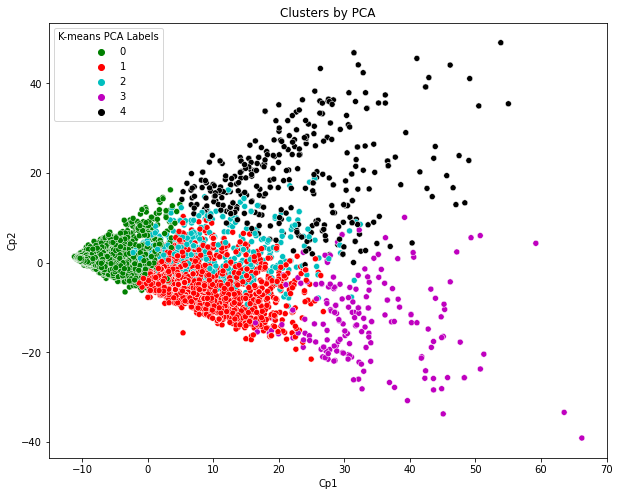

In [41]:
# Plot data by the first 2 components
x_axis = X_kmeans_pca['Cp1']
y_axis = X_kmeans_pca['Cp2']
plt.figure(figsize = (10, 8))
import seaborn as sns
sns.scatterplot(x_axis, y_axis, hue = X_kmeans_pca['K-means PCA Labels'], palette = ['g', 'r', 'c', 'm', 'k'])
plt.title('Clusters by PCA')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(scores_pca, kmeans_pca.labels_, metric='euclidean')

0.32411851807209513

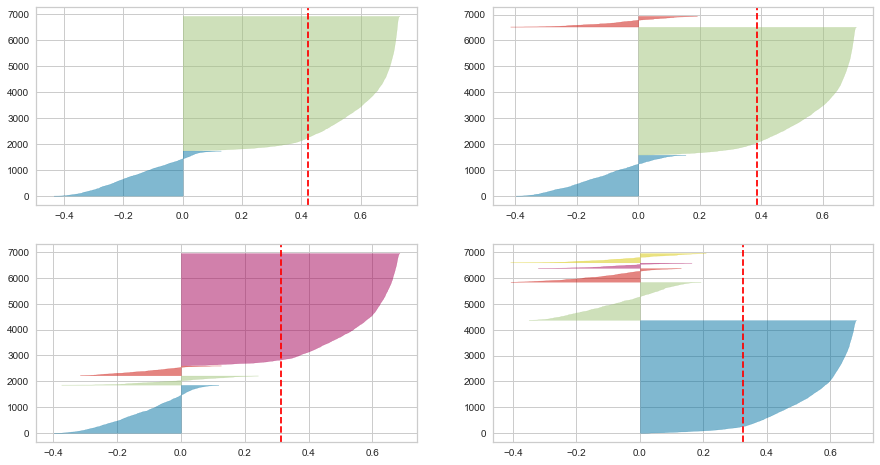

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scores_pca)

# Criteria:
# - Below average silhouette scores
# - Wide fluctuations in the size of the silhouette plots
# - Thickness of the silhouette plot

In [44]:
X_scaler_df_TOT = X_scaler_df.filter(regex='^TOT', axis=1)
X_scaler_df_TOT.shape

(6918, 77)

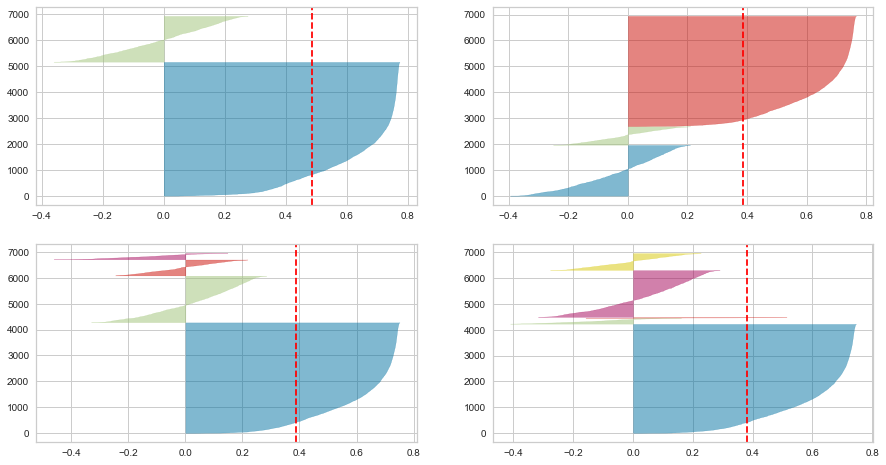

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaler_df_TOT)

In [46]:
kmeans_TOT = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_TOT_labels = kmeans_TOT.fit(X_scaler_df_TOT)
silhouette_score(X_scaler_df_TOT, kmeans_TOT.labels_, metric='euclidean')

0.3830815569195191

In [47]:
X_scaler_df_TOT.corr()

,TOT_MATHENR_ADVM_M,TOT_MATHENR_ADVM_F,TOT_APENR_M,TOT_APENR_F,TOT_APMATHENR_M,TOT_APMATHENR_F,TOT_APSCIENR_M,TOT_APSCIENR_F,TOT_APOTHENR_M,TOT_APOTHENR_F,...,TOT_RET_G12_F,TOT_SATACT_M,TOT_SATACT_F,TOT_SSSPORTS,TOT_SSTEAMS,TOT_SSPART,TOT_DISCWODIS_TFRALT_M,TOT_DISCWODIS_TFRALT_F,TOT_DISCWDIS_TFRALT_IDEA_M,TOT_DISCWDIS_TFRALT_IDEA_F
TOT_MATHENR_ADVM_M,1.000000,0.978714,0.764970,0.769992,0.691781,0.683486,0.668550,0.667287,0.748651,0.758089,...,0.197706,0.693936,0.704809,0.497317,0.394162,0.699852,0.190461,0.159931,0.149848,0.131386
TOT_MATHENR_ADVM_F,0.978714,1.000000,0.755395,0.777250,0.679506,0.687383,0.655237,0.668108,0.738540,0.764171,...,0.195250,0.692546,0.718216,0.498224,0.395168,0.702910,0.190303,0.164326,0.156137,0.139893
TOT_APENR_M,0.764970,0.755395,1.000000,0.978775,0.858663,0.836089,0.892133,0.871983,0.986851,0.966197,...,0.179845,0.732355,0.737287,0.479088,0.403866,0.726166,0.172616,0.150346,0.142316,0.136744
TOT_APENR_F,0.769992,0.777250,0.978775,1.000000,0.819120,0.824210,0.858261,0.870710,0.969531,0.989986,...,0.188061,0.744853,0.766970,0.493657,0.410920,0.732693,0.188133,0.163319,0.157430,0.148472
TOT_APMATHENR_M,0.691781,0.679506,0.858663,0.819120,1.000000,0.961523,0.822164,0.775005,0.826200,0.797669,...,0.111253,0.641697,0.632004,0.432038,0.355422,0.670972,0.091809,0.079748,0.081338,0.105294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOT_SSPART,0.699852,0.702910,0.726166,0.732693,0.670972,0.662645,0.625894,0.625547,0.694577,0.708202,...,0.150979,0.675169,0.677089,0.718195,0.579913,1.000000,0.155575,0.134265,0.131335,0.100836
TOT_DISCWODIS_TFRALT_M,0.190461,0.190303,0.172616,0.188133,0.091809,0.099998,0.143586,0.159412,0.174166,0.188011,...,0.141786,0.191927,0.212001,0.138129,0.069007,0.155575,1.000000,0.822420,0.696123,0.536683
TOT_DISCWODIS_TFRALT_F,0.159931,0.164326,0.150346,0.163319,0.079748,0.086662,0.123682,0.139583,0.151597,0.163488,...,0.114517,0.166556,0.185837,0.119169,0.061857,0.134265,0.822420,1.000000,0.620108,0.584035
TOT_DISCWDIS_TFRALT_IDEA_M,0.149848,0.156137,0.142316,0.157430,0.081338,0.093496,0.125423,0.136639,0.145804,0.159882,...,0.147306,0.150619,0.165451,0.116760,0.067028,0.131335,0.696123,0.620108,1.000000,0.679703


In [48]:
corr_matrix = X_scaler_df_TOT.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
tot_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
tot_to_drop

/var/folders/07/lc6xyqmx2szbq9t8c_f7m2pm0000gn/T/ipykernel_84503/971985915.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['TOT_MATHENR_ADVM_F',
 'TOT_APENR_F',
 'TOT_APMATHENR_M',
 'TOT_APMATHENR_F',
 'TOT_APSCIENR_M',
 'TOT_APSCIENR_F',
 'TOT_APOTHENR_M',
 'TOT_APOTHENR_F',
 'TOT_APEXAM_ONEORMORE_M',
 'TOT_APEXAM_ONEORMORE_F',
 'TOT_APEXAM_NONE_F',
 'TOT_ALGENR_GS0910_F',
 'TOT_ALGENR_GS1112_F',
 'TOT_ALGPASS_GS0910_M',
 'TOT_ALGPASS_GS0910_F',
 'TOT_ALGPASS_GS1112_M',
 'TOT_ALGPASS_GS1112_F',
 'TOT_MATHENR_ALG2_F',
 'TOT_SCIENR_BIOL_M',
 'TOT_SCIENR_BIOL_F',
 'TOT_MATHENR_CALC_F',
 'TOT_SCIENR_CHEM_M',
 'TOT_SCIENR_CHEM_F',
 'TOT_DUAL_F',
 'TOT_ENR_M',
 'TOT_ENR_F',
 'TOT_LEPENR_F',
 'TOT_LEPPROGENR_M',
 'TOT_LEPPROGENR_F',
 'TOT_IDEAENR_M',
 'TOT_IDEAENR_F',
 'TOT_504ENR_F',
 'TOT_DISCWODIS_EXPWE_F',
 'TOT_DISCWODIS_EXPZT_F',
 'TOT_MATHENR_GEOM_M',
 'TOT_MATHENR_GEOM_F',
 'TOT_GTENR_F',
 'TOT_SCIENR_PHYS_M',
 'TOT_SCIENR_PHYS_F',
 'TOT_RET_G09_F',
 'TOT_RET_G10_M',
 'TOT_RET_G10_F',
 'TOT_RET_G11_M',
 'TOT_RET_G11_F',
 'TOT_RET_G12_F',
 'TOT_SATACT_F',
 'TOT_DISCWODIS_TFRALT_M',
 'TOT_DISCWODIS_TFRALT

In [49]:
X_scaler_df_TOTdrop = X_scaler_df_TOT.drop(X_scaler_df_TOT[tot_to_drop], axis=1)
X_scaler_df_TOTdrop.shape

(6918, 29)

In [50]:
X_scaler_df_TOTdrop.head()

,TOT_MATHENR_ADVM_M,TOT_APENR_M,TOT_APEXAM_NONE_M,TOT_ALGENR_GS0910_M,TOT_ALGENR_GS1112_M,TOT_MATHENR_ALG2_M,TOT_MATHENR_CALC_M,TOT_DUAL_M,TOT_LEPENR_M,TOT_504ENR_M,...,TOT_DISCWDIS_EXPZT_IDEA_F,TOT_GTENR_M,TOT_RET_G09_M,TOT_RET_G12_M,TOT_SATACT_M,TOT_SSSPORTS,TOT_SSTEAMS,TOT_SSPART,TOT_DISCWDIS_TFRALT_IDEA_M,TOT_DISCWDIS_TFRALT_IDEA_F
0,-0.008539,-0.728683,-0.675462,-0.124297,-0.13965,0.433714,-0.405851,-0.161690,-0.251687,-0.533439,...,-0.093232,-0.272758,1.348595,-0.165364,0.177795,-1.544008,-0.716607,-0.196022,-0.265758,-0.191704
1,0.369547,-0.279429,-0.567706,0.715744,-0.13965,1.104261,-0.195917,-0.052765,-0.284261,-0.601280,...,-0.093232,0.980233,-0.201115,-0.364448,0.589312,-0.481863,-0.304475,1.159536,-0.265758,-0.191704
2,-0.553427,-0.682996,-0.675462,-0.742661,-0.32889,-0.582584,-0.499769,-0.434004,-0.479708,-0.295994,...,-0.093232,-0.233602,-0.670724,-0.364448,-0.586452,-0.614631,-0.510541,-0.759562,-0.265758,-0.191704
3,0.436268,-0.157598,-0.503053,0.377394,-0.07657,0.758511,-0.334032,0.260397,-0.235399,-0.024629,...,-0.093232,0.888869,0.550260,-0.115593,0.572515,-0.481863,-0.304475,1.159536,-0.265758,-0.191704
4,0.747633,-0.728683,-0.675462,1.439112,-0.07657,0.884238,-0.665507,-0.434004,-0.251687,-0.363835,...,-0.093232,-0.129187,1.442517,-0.065822,0.421346,-1.012936,-0.428115,0.533381,-0.265758,-0.191704


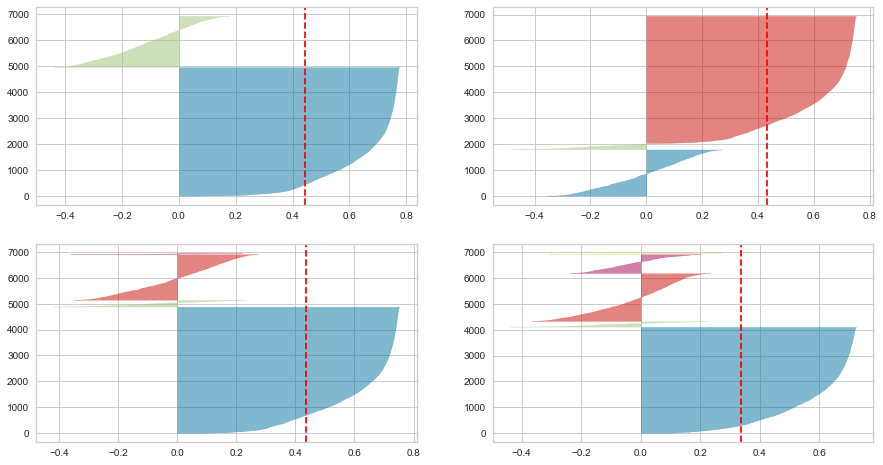

In [51]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaler_df_TOTdrop)

In [52]:
high_schools_df1 = high_schools[['TOT_APENR_M', 'TOT_APENR_F', 'TOT_APEXAM_ONEORMORE_M', 'TOT_APEXAM_ONEORMORE_F', 'SCH_CORPINSTANCES_IND', 'SCH_CREDITRECOVERYENR', 'TOT_DUAL_F', 'TOT_DUAL_M', 'TOT_ENR_F', 'TOT_ENR_M', 'TOT_LEPPROGENR_F', 'TOT_LEPPROGENR_M', 'TOT_DISCWODIS_EXPWE_F', 'TOT_DISCWODIS_EXPWE_M', 'TOT_DISCWODIS_EXPZT_M', 'TOT_DISCWODIS_EXPZT_F', 'TOT_GTENR_F', 'TOT_GTENR_M', 'TOT_RET_G11_F', 'TOT_RET_G11_M', 'TOT_RET_G12_F', 'TOT_RET_G12_M', 'TOT_SATACT_F', 'TOT_SATACT_M', 'SCH_OFFENSE_THRWW', 'SCH_OFFENSE_THRWX', 'SCH_OFFENSE_ATTWW', 'SCH_OFFENSE_ATTWX', 'SCH_OFFENSE_ROBWW', 'SCH_OFFENSE_ATTWOW', 'SCH_OFFENSE_BATT', 'SCH_OFFENSE_POSSWX', 'SCH_OFFENSE_RAPE', 'SCH_OFFENSE_ROBWOW', 'SCH_OFFENSE_ROBWX', 'SCH_OFFENSE_THRWOW', 'SCH_SAL_TEACH_WFED', 'SCH_SAL_AID_WFED', 'SCH_SAL_SUP_WFED', 'SCH_SAL_ADM_WFED', 'SCH_SAL_TOTPERS_WFED', 'SCH_FTE_ADM_WFED', 'SCH_FTE_AID_WFED', 'SCH_FTE_SUP_WFED', 'SCH_NPE_WFED', 'SCH_FTETEACH_TOT', 'SCH_FTECOUNSELORS', 'SCH_FTESECURITY_LEO', 'SCH_FTESECURITY_GUA', 'SCH_FTESERVICES_NUR', 'SCH_FTESERVICES_SOC', 'TOT_DISCWODIS_TFRALT_F', 'TOT_DISCWODIS_TFRALT_M']]

In [53]:
column_offenses = ['SCH_OFFENSE_THRWW', 'SCH_OFFENSE_THRWX', 'SCH_OFFENSE_ATTWW', 'SCH_OFFENSE_ATTWX', 'SCH_OFFENSE_ROBWW', 'SCH_OFFENSE_ATTWOW', 'SCH_OFFENSE_BATT', 'SCH_OFFENSE_POSSWX', 'SCH_OFFENSE_RAPE', 'SCH_OFFENSE_ROBWOW', 'SCH_OFFENSE_ROBWX', 'SCH_OFFENSE_THRWOW']

high_schools_df1['SCH_OFFENSES']=high_schools_df1[column_offenses].sum(axis=1)

column_othersSupport = ['SCH_FTECOUNSELORS', 'SCH_FTESECURITY_LEO', 'SCH_FTESECURITY_GUA', 'SCH_FTESERVICES_NUR', 'SCH_FTESERVICES_SOC']

high_schools_df1['SCH_FTEOTHERS']=high_schools_df1[column_othersSupport].sum(axis=1)

/var/folders/07/lc6xyqmx2szbq9t8c_f7m2pm0000gn/T/ipykernel_84503/1900721944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_schools_df1['SCH_OFFENSES']=high_schools_df1[column_offenses].sum(axis=1)
/var/folders/07/lc6xyqmx2szbq9t8c_f7m2pm0000gn/T/ipykernel_84503/1900721944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_schools_df1['SCH_FTEOTHERS']=high_schools_df1[column_othersSupport].sum(axis=1)


In [54]:
high_schools_df1 = high_schools_df1.drop(['SCH_OFFENSE_THRWW', 'SCH_OFFENSE_THRWX', 'SCH_OFFENSE_ATTWW', 'SCH_OFFENSE_ATTWX', 'SCH_OFFENSE_ROBWW', 'SCH_OFFENSE_ATTWOW', 'SCH_OFFENSE_BATT', 'SCH_OFFENSE_POSSWX', 'SCH_OFFENSE_RAPE', 'SCH_OFFENSE_ROBWOW', 'SCH_OFFENSE_ROBWX', 'SCH_OFFENSE_THRWOW', 'SCH_FTECOUNSELORS', 'SCH_FTESECURITY_LEO', 'SCH_FTESECURITY_GUA', 'SCH_FTESERVICES_NUR', 'SCH_FTESERVICES_SOC'], axis=1)

high_schools_df1.columns

Index(['TOT_APENR_M', 'TOT_APENR_F', 'TOT_APEXAM_ONEORMORE_M',
       'TOT_APEXAM_ONEORMORE_F', 'SCH_CORPINSTANCES_IND',
       'SCH_CREDITRECOVERYENR', 'TOT_DUAL_F', 'TOT_DUAL_M', 'TOT_ENR_F',
       'TOT_ENR_M', 'TOT_LEPPROGENR_F', 'TOT_LEPPROGENR_M',
       'TOT_DISCWODIS_EXPWE_F', 'TOT_DISCWODIS_EXPWE_M',
       'TOT_DISCWODIS_EXPZT_M', 'TOT_DISCWODIS_EXPZT_F', 'TOT_GTENR_F',
       'TOT_GTENR_M', 'TOT_RET_G11_F', 'TOT_RET_G11_M', 'TOT_RET_G12_F',
       'TOT_RET_G12_M', 'TOT_SATACT_F', 'TOT_SATACT_M', 'SCH_SAL_TEACH_WFED',
       'SCH_SAL_AID_WFED', 'SCH_SAL_SUP_WFED', 'SCH_SAL_ADM_WFED',
       'SCH_SAL_TOTPERS_WFED', 'SCH_FTE_ADM_WFED', 'SCH_FTE_AID_WFED',
       'SCH_FTE_SUP_WFED', 'SCH_NPE_WFED', 'SCH_FTETEACH_TOT',
       'TOT_DISCWODIS_TFRALT_F', 'TOT_DISCWODIS_TFRALT_M', 'SCH_OFFENSES',
       'SCH_FTEOTHERS'],
      dtype='object')

In [55]:
X1 = high_schools_df1.iloc[:,:]
X_scaler1 = scaler.fit_transform(X1)
X_scaler1 = KNNImputer().fit_transform(X_scaler1)

In [56]:
X_scaler1_df = pd.DataFrame(X_scaler1)
X_scaler1_df.corr()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.000000,0.978471,0.956236,0.937762,-0.167026,0.342422,0.403025,0.364974,0.787884,0.796824,...,0.335147,0.016843,0.041897,0.018086,0.049600,0.757522,0.152212,0.176035,0.149166,0.023135
1,0.978471,1.000000,0.934977,0.956987,-0.173630,0.358329,0.406636,0.353217,0.821547,0.817383,...,0.341705,0.012974,0.041658,0.014250,0.054862,0.781640,0.165603,0.192158,0.167838,0.036292
2,0.956236,0.934977,1.000000,0.976196,-0.164236,0.303153,0.361275,0.325049,0.745939,0.751651,...,0.312387,-0.008319,0.034733,-0.007374,0.045760,0.707636,0.136530,0.158016,0.118508,0.033113
3,0.937762,0.956987,0.976196,1.000000,-0.172119,0.321193,0.362088,0.309569,0.778065,0.771552,...,0.319863,-0.008819,0.031565,-0.007838,0.049856,0.732811,0.150823,0.174100,0.135834,0.048360
4,-0.167026,-0.173630,-0.164236,-0.172119,1.000000,-0.109691,-0.103537,-0.095182,-0.180701,-0.178571,...,-0.076384,-0.004281,-0.006554,-0.003952,0.020536,-0.160938,-0.048543,-0.037497,-0.085233,-0.006237
5,0.342422,0.358329,0.303153,0.321193,-0.109691,1.000000,0.292240,0.260436,0.525483,0.525287,...,0.201190,0.000640,-0.010427,0.001052,0.066795,0.505982,0.178511,0.204967,0.276024,0.058876
6,0.403025,0.406636,0.361275,0.362088,-0.103537,0.292240,1.000000,0.938837,0.458793,0.455245,...,0.185645,-0.002743,0.006643,-0.001894,0.024832,0.431750,0.088745,0.089672,0.156514,0.010213
7,0.364974,0.353217,0.325049,0.309569,-0.095182,0.260436,0.938837,1.000000,0.378888,0.386773,...,0.158694,-0.000732,0.007092,-0.000075,0.016239,0.365372,0.053005,0.049809,0.156573,0.000962
8,0.787884,0.821547,0.745939,0.778065,-0.180701,0.525483,0.458793,0.378888,1.000000,0.988088,...,0.393653,0.010309,0.019619,0.011895,0.127302,0.946260,0.240118,0.275099,0.291195,0.049245
9,0.796824,0.817383,0.751651,0.771552,-0.178571,0.525287,0.455245,0.386773,0.988088,1.000000,...,0.397679,0.013194,0.020070,0.014648,0.112382,0.956487,0.245099,0.283166,0.306641,0.045955


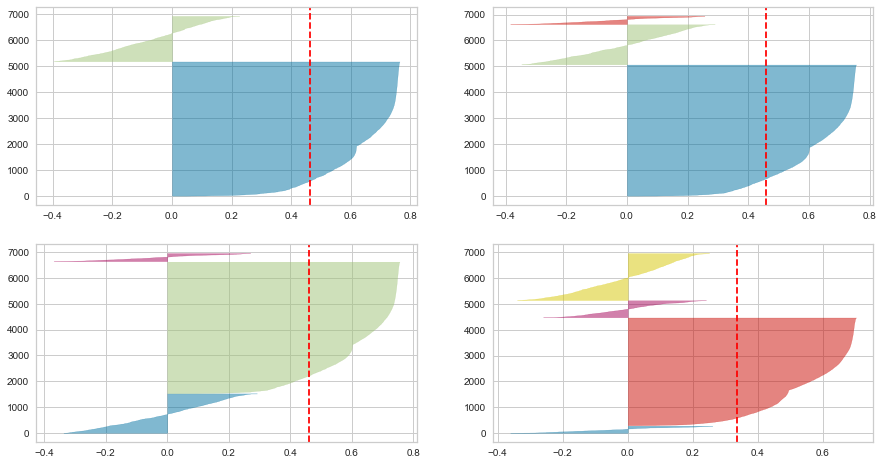

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaler1)

In [58]:
#from sklearn.cluster import SpectralClustering

#sScores = []
#for i in range(1, 21):
   # spc = SpectralClustering(n_clusters=i, affinity='rbf', n_init=10, random_state=42)
   # spc_labels = spc.fit(X_scaler1)
   # sScores.append(silhouette_score(X_scaler1, spc_labels, metric='euclidean'))


In [59]:
#plt.figure(figsize = (10,8))
#plt.plot(range(1,21), sScores, marker='o', linestyle = '--')
#plt.title('Spectral Clustering')
#plt.xlabel('Number of Clusters')
#plt.ylabel('Silhouette Scores')
#plt.show()

In [60]:
#from sklearn.cluster import SpectralClustering

#spc = SpectralClustering(n_clusters=5, affinity='rbf', n_init=10, random_state=42)
#spc_labels = spc.fit(X_scaler1)
#silhouette_score(X_scaler1, spc_labels, metric='euclidean')

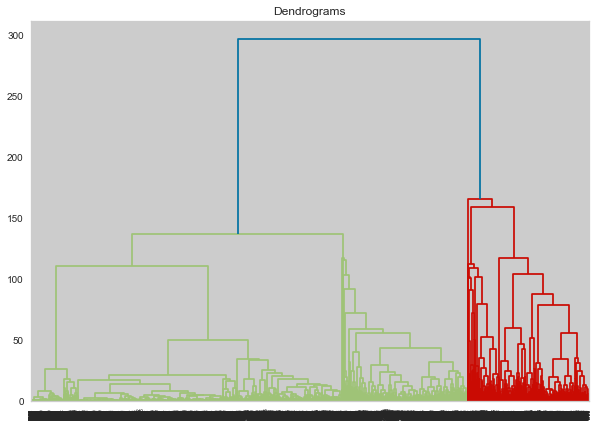

In [61]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_scaler1, method='ward'))

In [62]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
ac_labels = ac.fit(X_scaler1)
silhouette_score(X_scaler1, ac.labels_, metric='euclidean')

0.26782469744729476

In [64]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ac_labels = ac.fit(X_scaler1)
silhouette_score(X_scaler1, ac.labels_, metric='euclidean')

0.469668080614667

In [65]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ac_labels = ac.fit(X_scaler1)
silhouette_score(X_scaler1, ac.labels_, metric='euclidean')

0.46881963869357407

In [72]:
ac = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
ac_labels = ac.fit(X_scaler1)
silhouette_score(X_scaler1, ac.labels_, metric='euclidean')

0.3152707977995285